In [80]:
import numpy as np
import matplotlib.pyplot as plt
import gc
%matplotlib inline

In [81]:
train = np.load('../../data/train_sans_ocean.npy')
train.shape

(26378244, 38)

In [84]:
pixels = train.shape[0]//108
spatial = np.reshape(train,(pixels,9,12,train.shape[1]))#converts the array into 3D, first is all pixels, second is time steps and thrid is features


The array is structured as (pixels,years,months,features)

In [86]:
spatial.shape

(244243, 9, 12, 38)

In [105]:
ign = spatial[:,0:,0:,15]


Index(['lat 0', 'lon 1', 'time 2', 'agb 3', 'pft_fracCover 4', 'sm 5', 'pftCrop 6',
       'pftHerb 7', 'pftShrubBD 8', 'pftShrubNE 9', 'pftTreeBD 10', 'pftTreeBE 11',
       'pftTreeND 12', 'pftTreeNE 13', 'GDP 14', 'ign 15', 'Distance_to_populated_areas 16',
       'fPAR 17', 'LAI 18', 'NLDI 19', 'vod_K_anomalies 20', 'FPAR_12mon 21', 'LAI_12mon 22',
       'Vod_k_anomaly_12mon 23', 'FPAR_06mon 24', 'LAI_06mon 25', 'Vod_k_anomaly_06mon 26',
       'WDPA_fracCover 27', 'dtr 28', 'pet 29', 'tmx 30', 'wet 31', 'Biome 32', 'precip 33',
       'Livestock 34', 'road_density 35', 'topo 36', 'pop_density 37'],
      dtype='object')

In [106]:
ign.shape

(244243, 9, 12)

In [115]:
ign_mean = np.nanmean(ign,axis=1)

/tmp/ipykernel_733436/1876977266.py:1: RuntimeWarning: Mean of empty slice
  ign_mean = np.nanmean(ign,axis=1)


In [116]:
ign_mean.shape

(244243, 12)

In [119]:
np.nan_to_num(ign_mean,copy = False,nan=0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
ign_mean

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:
import seaborn as sns


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

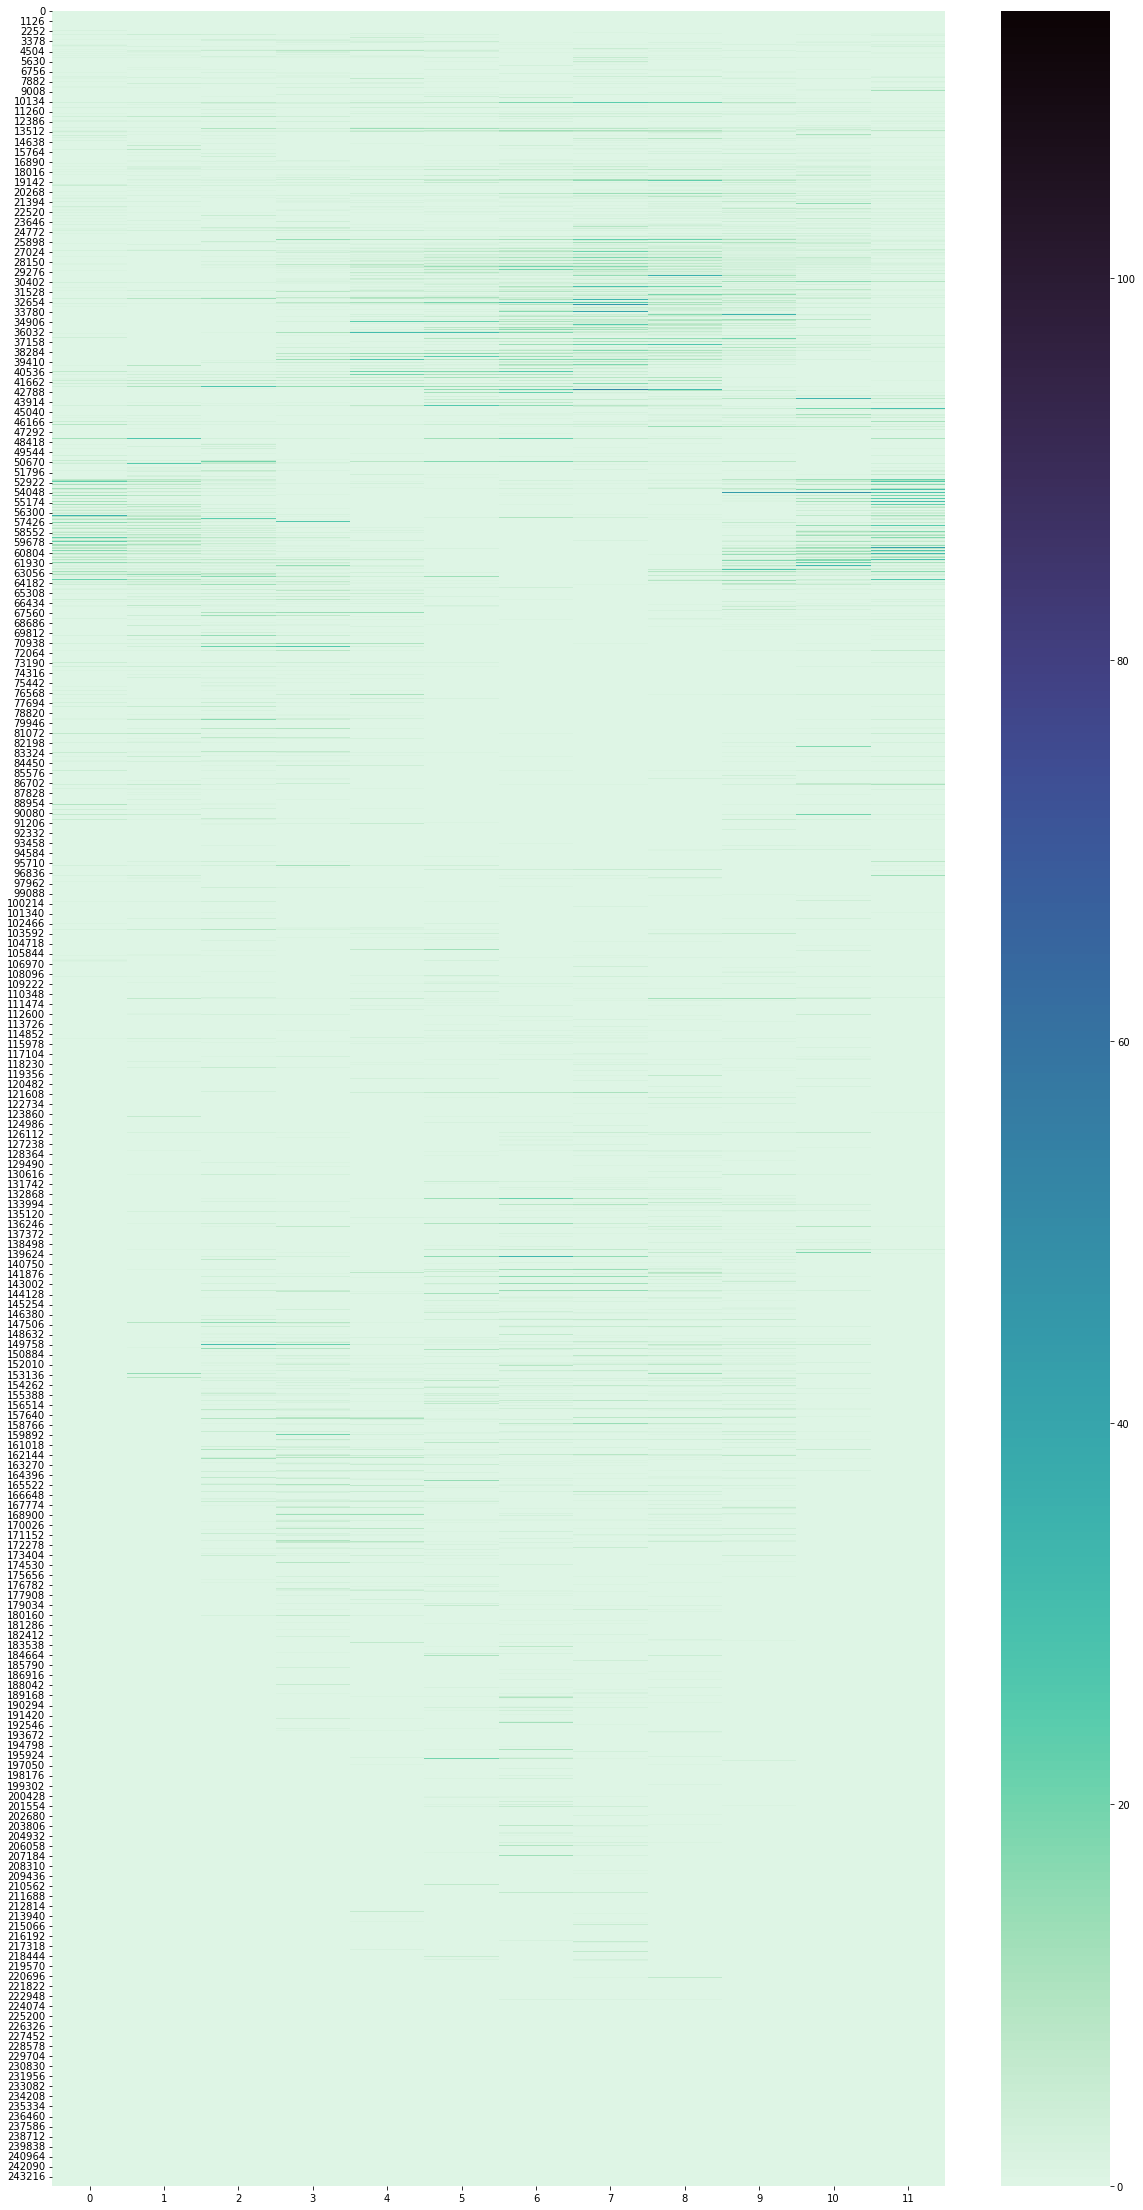

In [134]:
plt.rcParams["figure.figsize"] = (20,40)
ax = sns.heatmap(ign_mean,cmap = "mako_r")
plt.show()

In [124]:
np.max(ign_mean)

114.0

(array([[2.33401e+05, 4.51400e+03, 2.02400e+03, 1.23200e+03, 7.66000e+02,
         6.04000e+02, 4.15000e+02, 3.07000e+02, 2.28000e+02, 2.09000e+02,
         1.54000e+02, 1.19000e+02, 7.90000e+01, 5.70000e+01, 3.40000e+01,
         3.20000e+01, 1.60000e+01, 8.00000e+00, 4.00000e+00, 9.00000e+00,
         9.00000e+00, 5.00000e+00, 5.00000e+00, 4.00000e+00, 3.00000e+00,
         0.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [2.31216e+05, 6.07500e+03, 2.64700e+03, 1.59600e+03, 9.01000e+02,
         5.98000e+02, 4.13000e+02, 2.38000e+02, 1.85000e+02, 1.12000e+02,
         9.40000e+01, 6.20000e+01, 3.20000e+01, 2.50000e+01, 1.40000e+01,
         1.10000e+01, 8.00000e+00, 8.

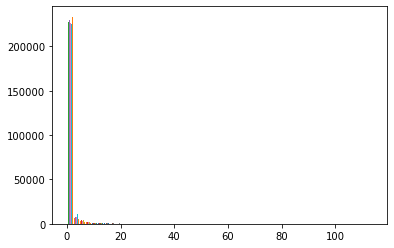

In [125]:
plt.hist(ign_mean,bins= 50)


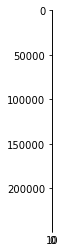

In [118]:
plt.imshow(ign_mean)
plt.show()

Looking how to split an array into 3D, look if the time dimension is preserved, because reshape doesn't transform the matrix, use transpose etc to do that

In [3]:
arr = np.arange(105)
arr = np.reshape(arr, (21,5))
arr.shape

(21, 5)

In [ ]:
arr

In [5]:
arr1 = np.reshape(arr,(-1,3,5))

In [6]:
arr1.shape

(7, 3, 5)

In [ ]:
arr1

In [8]:
arr1[0,::]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [10]:
arr1[:,0,:]

array([[ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19],
       [30, 31, 32, 33, 34],
       [45, 46, 47, 48, 49],
       [60, 61, 62, 63, 64],
       [75, 76, 77, 78, 79],
       [90, 91, 92, 93, 94]])

In [16]:
test = arr1[:,0,:]

In [17]:
test.shape

(7, 5)

In [18]:
test

array([[ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19],
       [30, 31, 32, 33, 34],
       [45, 46, 47, 48, 49],
       [60, 61, 62, 63, 64],
       [75, 76, 77, 78, 79],
       [90, 91, 92, 93, 94]])

In [20]:
test[:,0]

array([ 0, 15, 30, 45, 60, 75, 90])

In [21]:
test1 = (arr1[:,0,:])[:,0]
test1

array([ 0, 15, 30, 45, 60, 75, 90])

In [22]:
arr1[:,0,:][:,0]

array([ 0, 15, 30, 45, 60, 75, 90])

This will convert the array into a 4D one, so that I have all the years stacked up

In [1]:
import numpy as np
arr = np.empty((90,2),dtype=np.int16)

In [ ]:
arr = np.empty((90,2),dtype=np.int16)
c = range(2,12,1)
first = True
pixel = 0
t_res = 6 #temporal resolution
for i in c:
    temp = range(i,i*7,i)
    #print(temp)
    if (i%2==0):
        col = 0
        if (first==False):
            pixel = pixel+1
            print(pixel,"pixel")
    else:
        col = 1
        first = False
    row = pixel*18
    for j in temp:
        print(row,col,j)
        arr[row][col]=j
        arr[row+t_res][col]=j
        arr[row+t_res*2][col]=j
        row = row+1 


In [ ]:
arr

In [25]:
arr = np.reshape(arr,(5,-1,2))


In [ ]:
arr

In [ ]:
arr_new = np.reshape(arr,(5,3,-1,2))
arr_new

In [ ]:
arr_new[3]#indexing the array as arr[i] gives me a certain pixwl with all its features and all the time steps

The array is structured as (pixels,years,months,features)

In [100]:
arr_new[0,::,0:,0]#Doing this gives me all the months in all the years
#What I want is all the years, like month 1, all years
#Changing the alst zero gives me the features

array([[ 2,  4,  6,  8, 10, 12],
       [ 2,  4,  6,  8, 10, 12],
       [ 2,  4,  6,  8, 10, 12]], dtype=int16)

In [88]:
f1 = arr_new[::,0:,0]

In [101]:
arr_new[1,::,0:,0]

array([[ 4,  8, 12, 16, 20, 24],
       [ 4,  8, 12, 16, 20, 24],
       [ 4,  8, 12, 16, 20, 24]], dtype=int16)

In [104]:
arr_new[:,0:,0:,1]

array([[[ 3,  6,  9, 12, 15, 18],
        [ 3,  6,  9, 12, 15, 18],
        [ 3,  6,  9, 12, 15, 18]],

       [[ 5, 10, 15, 20, 25, 30],
        [ 5, 10, 15, 20, 25, 30],
        [ 5, 10, 15, 20, 25, 30]],

       [[ 7, 14, 21, 28, 35, 42],
        [ 7, 14, 21, 28, 35, 42],
        [ 7, 14, 21, 28, 35, 42]],

       [[ 9, 18, 27, 36, 45, 54],
        [ 9, 18, 27, 36, 45, 54],
        [ 9, 18, 27, 36, 45, 54]],

       [[11, 22, 33, 44, 55, 66],
        [11, 22, 33, 44, 55, 66],
        [11, 22, 33, 44, 55, 66]]], dtype=int16)

In [107]:
arr_new[:,0:,0:,0].shape

(5, 3, 6)

In [108]:
np.nanmean(arr_new[:,0:,0:,0],axis=1)

array([[ 2.,  4.,  6.,  8., 10., 12.],
       [ 4.,  8., 12., 16., 20., 24.],
       [ 6., 12., 18., 24., 30., 36.],
       [ 8., 16., 24., 32., 40., 48.],
       [10., 20., 30., 40., 50., 60.]])

In [89]:
f1.shape

(5, 3, 2)

In [90]:
np.nanmean(f1,axis = 1)

array([[ 2.,  3.],
       [ 4.,  5.],
       [ 6.,  7.],
       [ 8.,  9.],
       [10., 11.]])

(_,9,12)

The array is structured as (pixels,years,months,features)

In [93]:
arr_new[0,::,0:,1]

array([[ 3,  6,  9, 12, 15, 18],
       [ 3,  6,  9, 12, 15, 18],
       [ 3,  6,  9, 12, 15, 18]], dtype=int16)

So what we change is the first index to get every pixel, and we change the last index to get all the features, but I don't need for all features, now do I, at least plotting over all feautes is not required, but maybe calculating the average, median, sd etc would be a good idea would be a good idea

In [63]:
arr_new[0,::,0:,0][:,0]#Changing the last zero in the second bracket gives in months over time

array([8, 8, 8], dtype=int16)

In [ ]:
arr_new[::,0:,0]

In [57]:
arr_new[0,::,0:,0].shape

(3, 6)

In [10]:
test = np.arange(12)
test = np.reshape(test,(6,-1))
test

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [12]:
temp = range(2,14,2)
c = 0
for i in temp:
    test[c][0]=i
    c=c+1
test

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9],
       [12, 11]])